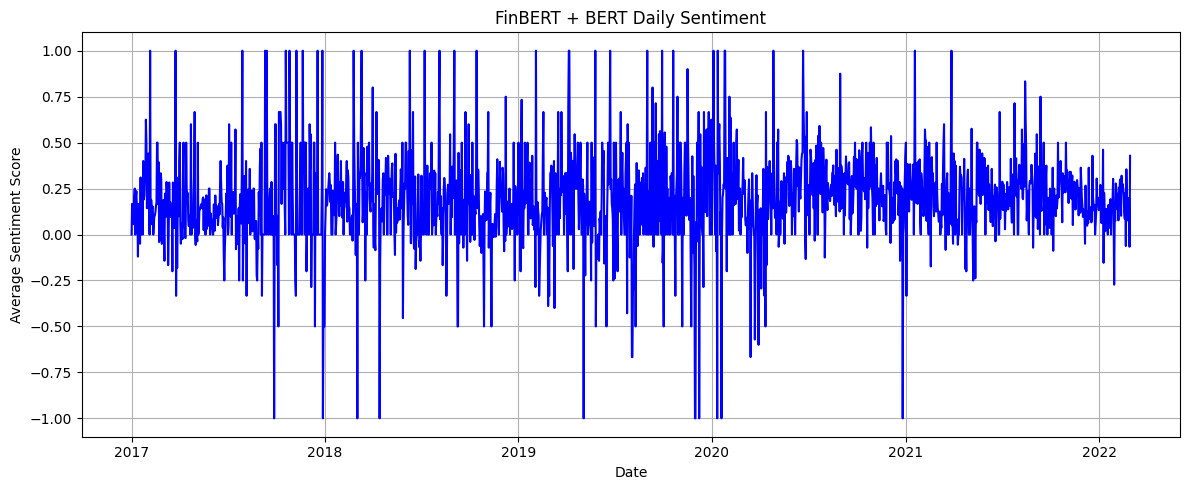

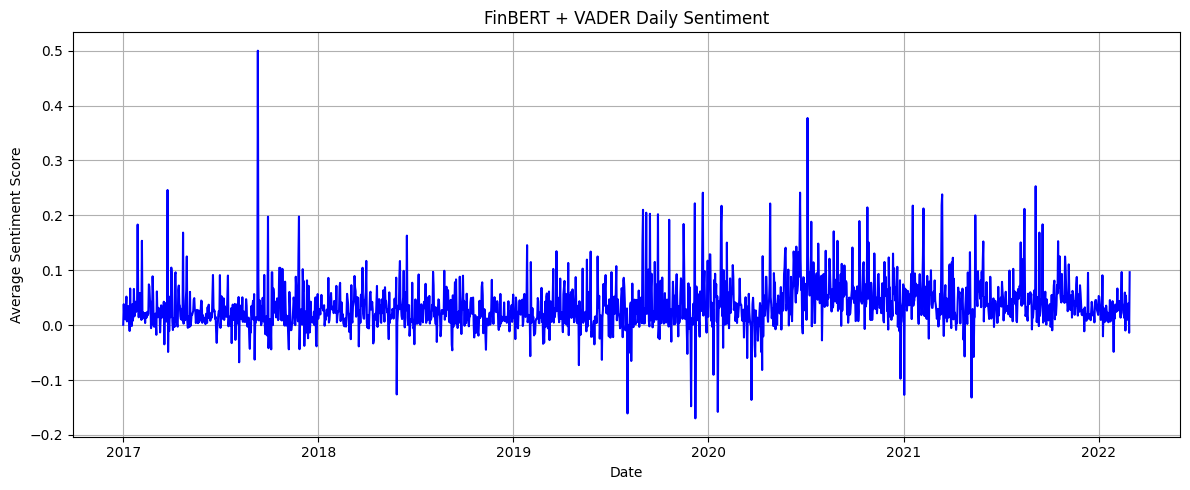

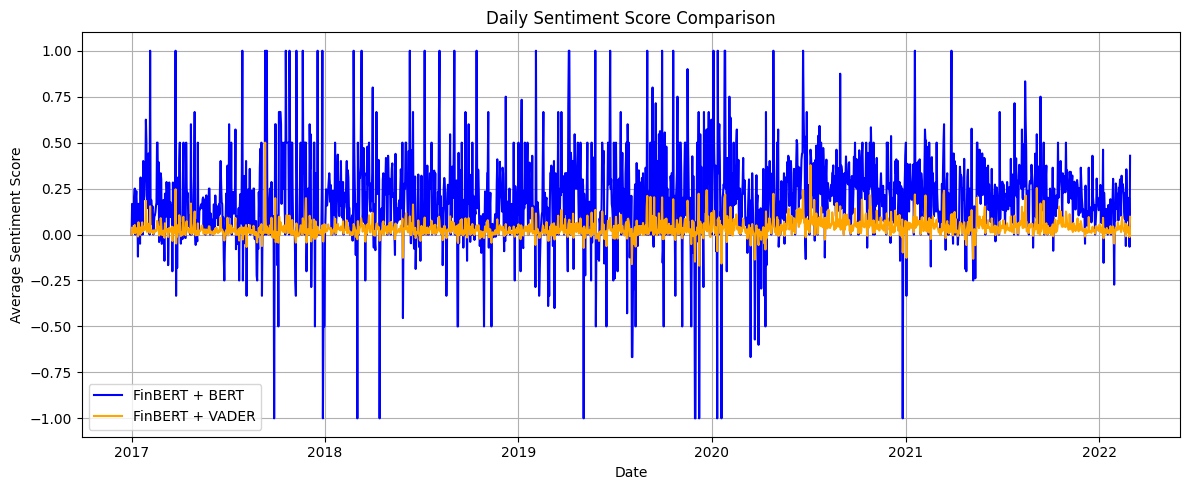

Correlation between FinBERT+BERT and FinBERT+VADER: 0.7844


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class SentimentVisualizer:
    @staticmethod
    def plot_sentiment_distribution(df, column_name, title):
        """Sentiment"""
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=column_name, order=['positive', 'neutral', 'negative'], palette='Set2')
        plt.title(title)
        plt.xlabel("Sentiment")
        plt.ylabel("Tweet Count")
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def plot_sentiment_trend(df, sentiment_col, title):
        """Sentiment Trends"""
        df['Date'] = pd.to_datetime(df['Date'])
        trend = df[df[sentiment_col] == 'positive'].groupby(df['Date'].dt.date).size()
        trend.plot(kind='line', figsize=(10, 4), title=title)
        plt.xlabel('Date')
        plt.ylabel('Count of Positive Tweets')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_sentiment_pie(df, column_name, title):
        """Sentiment Pie Chart"""
        counts = df[column_name].value_counts()
        counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3', figsize=(5, 5))
        plt.title(title)
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_comparison_trend(bert_path, vader_path):
        """Plotting FinBERT+BERT versus FinBERT+VADER Sentiment Trends"""
        df_bert = pd.read_csv(bert_path, parse_dates=['date']).rename(columns={'avg_sentiment_score': 'bert_score'})
        df_vader = pd.read_csv(vader_path, parse_dates=['date']).rename(columns={'avg_sentiment_score': 'vader_score'})
        df_merge = pd.merge(df_bert, df_vader, on='date', how='inner')

        plt.figure(figsize=(12, 5))
        plt.plot(df_merge['date'], df_merge['bert_score'], label='FinBERT + BERT', color='blue')
        plt.plot(df_merge['date'], df_merge['vader_score'], label='FinBERT + VADER', color='orange')
        plt.title('Daily Sentiment Score Comparison')
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment Score')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_score_correlation(bert_path, vader_path):
        """Plotting Scatter Plots of FinBERT+BERT vs. FinBERT+VADER Sentiment Score Correlations"""
        df_bert = pd.read_csv(bert_path, parse_dates=['date']).rename(columns={'avg_sentiment_score': 'bert_score'})
        df_vader = pd.read_csv(vader_path, parse_dates=['date']).rename(columns={'avg_sentiment_score': 'vader_score'})
        df_merge = pd.merge(df_bert, df_vader, on='date', how='inner')

        corr = df_merge[['bert_score', 'vader_score']].corr().iloc[0,1]

        plt.figure(figsize=(6, 6))
        sns.regplot(data=df_merge, x='bert_score', y='vader_score', scatter_kws={'alpha':0.6})
        plt.title(f'Sentiment Correlation (r = {corr:.4f})')
        plt.xlabel('FinBERT + BERT Sentiment')
        plt.ylabel('FinBERT + VADER Sentiment')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_daily_sentiment_score(df, model_name, title):
        """Plotting the trend of a model's daily sentiment score"""
        plt.figure(figsize=(12, 5))
        plt.plot(df['date'], df['avg_sentiment_score'], label=model_name, color='blue')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment Score')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_comparison(df_compare):
        """Plotting the daily sentiment scores of the two models against each other"""
        plt.figure(figsize=(12, 5))
        plt.plot(df_compare['date'], df_compare['avg_sentiment_score_bert'], label='FinBERT + BERT', color='blue')
        plt.plot(df_compare['date'], df_compare['avg_sentiment_score_vader'], label='FinBERT + VADER', color='orange')
        plt.title('Daily Sentiment Score Comparison')
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment Score')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    # read 
    df_bert = pd.read_csv("../2_data/daily_sentiment_bert.csv")
    df_vader = pd.read_csv("../2_data/daily_sentiment_vader.csv")

    # Ensure date is the datetime format
    df_bert['date'] = pd.to_datetime(df_bert['date'])
    df_vader['date'] = pd.to_datetime(df_vader['date'])

    # remove rows with missing score
    df_bert = df_bert.dropna(subset=['avg_sentiment_score'])
    df_vader = df_vader.dropna(subset=['avg_sentiment_score'])

    # visualize daily sentiment score trends for each model
    SentimentVisualizer.plot_daily_sentiment_score(
        df_bert, model_name='FinBERT + BERT', title='FinBERT + BERT Daily Sentiment'
    )
    SentimentVisualizer.plot_daily_sentiment_score(
        df_vader, model_name='FinBERT + VADER', title='FinBERT + VADER Daily Sentiment'
    )

    # Combining data to compare trends
    df_compare = pd.merge(df_bert, df_vader, on='date', suffixes=('_bert', '_vader'))

    # Visualization Comparison Chart
    SentimentVisualizer.plot_comparison(df_compare)

    # Print Pearson's correlation coefficient
    correlation = df_compare['avg_sentiment_score_bert'].corr(df_compare['avg_sentiment_score_vader'])
    print(f"Correlation between FinBERT+BERT and FinBERT+VADER: {correlation:.4f}")
    

- Bert is more sensitive to extremes, while VADER is more conservative
- Correlation coefficients are high and most of the time market sentiment is judged consistently